# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [3]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Relevant feature #0     9.566665
Relevant feature #1    40.192077
Noisy feature #0        0.000000
Noisy feature #1        0.000000
Noisy feature #2        0.000000
dtype: float64

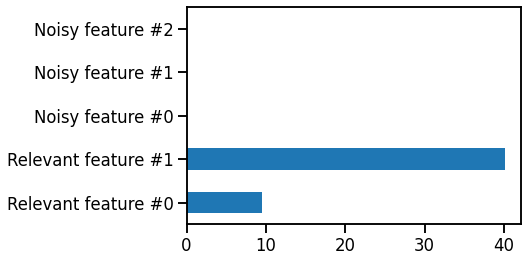

In [4]:
import pandas as pd

feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [6]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(data, target)
print(model1.coef_)
print(model1.intercept_)

[10.89587004 40.41128042 -0.20542454 -0.18954462  0.11129768]
0.03035092187591669


Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [7]:
data

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , -0.10408058, -0.23485774],
       [-0.25090635, -0.96275025,  0.49340515,  2.13305005,  0.98388829],
       [-1.80928169,  0.04235881,  0.51687218, -0.03292069,  1.29811143]])

In [21]:
data[:,0:2]

array([[ 1.76405235,  0.40015721],
       [-0.97727788,  0.95008842],
       [ 0.14404357,  1.45427351],
       ...,
       [-0.77440295,  0.70878733],
       [-0.25090635, -0.96275025],
       [-1.80928169,  0.04235881]])

In [12]:
data[:,1].reshape(-1,1)

array([[ 0.40015721],
       [ 0.95008842],
       [ 1.45427351],
       ...,
       [ 0.70878733],
       [-0.96275025],
       [ 0.04235881]])

In [ ]:
data[:]

In [13]:
import numpy as np
np.concatenate((data, data[:,1].reshape(-1,1)), axis=1)

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
         0.40015721],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.95008842],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         1.45427351],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , -0.10408058, -0.23485774,
         0.70878733],
       [-0.25090635, -0.96275025,  0.49340515,  2.13305005,  0.98388829,
        -0.96275025],
       [-1.80928169,  0.04235881,  0.51687218, -0.03292069,  1.29811143,
         0.04235881]])

In [22]:
data1 = np.concatenate((data, data[:,0:2]), axis=1)
data2 = np.concatenate((data1, data[:,0:2]), axis=1)
data2

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.40015721,
         1.76405235,  0.40015721],
       [-0.97727788,  0.95008842, -0.15135721, ...,  0.95008842,
        -0.97727788,  0.95008842],
       [ 0.14404357,  1.45427351,  0.76103773, ...,  1.45427351,
         0.14404357,  1.45427351],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , ...,  0.70878733,
        -0.77440295,  0.70878733],
       [-0.25090635, -0.96275025,  0.49340515, ..., -0.96275025,
        -0.25090635, -0.96275025],
       [-1.80928169,  0.04235881,  0.51687218, ...,  0.04235881,
        -1.80928169,  0.04235881]])

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

In [24]:
model2 = LinearRegression()
model2.fit(data2, target)
print(model2.coef_)
print(model2.intercept_)

[ 1.31388260e+12 -1.59473665e+14 -1.99218750e-01 -1.68457031e-01
  9.52148438e-02 -6.56941302e+11  4.12806902e+13 -6.56941302e+11
  1.18192975e+14]
0.031069731298306577


Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

In [25]:
from sklearn.linear_model import Ridge

model3 = Ridge()
model3.fit(data2, target)
print(model3.coef_)
print(model2.intercept_)

[ 3.6313933  13.46802113 -0.20549345 -0.18929961  0.11117205  3.6313933
 13.46802113  3.6313933  13.46802113]
0.031069731298306577


Can you find the relationship between the ridge coefficients and the original
coefficients?

In [28]:
coef[0]/coef[1]

0.238023646574219

In [29]:
model3.coef_[0]/model3.coef_[1]

0.26963079943678414

In [30]:
model3.coef_[0] * 3

10.894179909038588

In [31]:
model3.coef_[1] * 3

40.40406337775505